##### Copyright 2019 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image segmentation

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/segmentation">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/segmentation.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/segmentation.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/segmentation.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial focuses on the task of image segmentation, using a modified <a href="https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/" class="external">U-Net</a>.

## What is image segmentation?

In an image classification task, the network assigns a label (or class) to each input image. However, suppose you want to know the shape of that object, which pixel belongs to which object, etc. In this case, you need to assign a class to each pixel of the image—this task is known as segmentation. A segmentation model returns much more detailed information about the image. Image segmentation has many applications in medical imaging, self-driving cars and satellite imaging, just to name a few.

This tutorial uses the [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) ([Parkhi et al, 2012](https://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf)). The dataset consists of images of 37 pet breeds, with 200 images per breed (~100 each in the training and test splits). Each image includes the corresponding labels, and pixel-wise masks. The masks are class-labels for each pixel. Each pixel is given one of three categories:

- Class 1: Pixel belonging to the pet.
- Class 2: Pixel bordering the pet.
- Class 3: None of the above/a surrounding pixel.

In [1]:
!pip install git+https://github.com/tensorflow/examples.git
!pip install -U keras
!pip install -q tensorflow_datasets
!pip install -q -U tensorflow-text tensorflow

  Cloning https://github.com/tensorflow/examples.git to c:\users\z.marouf-araibi\appdata\local\temp\pip-req-build-7mcof5p7
  Resolved https://github.com/tensorflow/examples.git to commit fff4bcda7201645a1efaea4534403daf5fc03d42
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


DEPRECATION: Loading egg at c:\users\z.marouf-araibi\appdata\local\programs\python\python312\lib\site-packages\coco_dataset_generator-1.0-py3.12.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git 'C:\Users\z.marouf-araibi\AppData\Local\Temp\pip-req-build-7mcof5p7'
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [32 lines of output]
      Traceback (most recent call last):
        File "C:\Users\z.marouf-araibi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pkg_resources\__init__.py", line 2208, in _handle_ns
          loader = importer.find_spec(packageName).loader
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      AttributeError: 'NoneType' object has no attribute 'loader'
      
      During handling of the above excep

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/8d/44/c604ecc5c9993b6574a681f2f505e980725871a89cfd9e48597b12ccb506/keras-3.3.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB 1.3 MB/s eta 0:00:01
   - -------------------------------------- 0.0/1.1 MB 1.3 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/1.1 MB 469.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.1 MB 525.1 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.1 MB 595.3 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.1 MB 595.3 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.1 MB 595.3 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.1 MB 811.7 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.1 MB 811.7 kB/s eta 0:00:02
   ------------ ----------------------

DEPRECATION: Loading egg at c:\users\z.marouf-araibi\appdata\local\programs\python\python312\lib\site-packages\coco_dataset_generator-1.0-py3.12.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\z.marouf-araibi\appdata\local\programs\python\python312\lib\site-packages\coco_dataset_generator-1.0-py3.12.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [32 lines of output]
      Traceback (most recent call last):
        File "C:\Users\z.marouf-araibi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pkg_resources\__init__.py", line 2208, in _handle_ns
          loader = importer.find_spec(packageName).loader
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      A

In [2]:
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

c:\Users\z.marouf-araibi\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'builder' from 'google.protobuf.internal' (c:\Users\z.marouf-araibi\AppData\Local\Programs\Python\Python39\lib\site-packages\google\protobuf\internal\__init__.py)

In [4]:
from tensorflow_examples.models.pix2pix import pix2pix

from IPython.display import clear_output
import matplotlib.pyplot as plt

## Download the Oxford-IIIT Pets dataset

The dataset is [available from TensorFlow Datasets](https://www.tensorflow.org/datasets/catalog/oxford_iiit_pet). The segmentation masks are included in version 3+.

In [5]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

 In addition, the image color values are normalized to the `[0, 1]` range. Finally, as mentioned above the pixels in the segmentation mask are labeled either {1, 2, 3}. For the sake of convenience, subtract 1 from the segmentation mask, resulting in labels that are : {0, 1, 2}.

In [6]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask

In [7]:
def load_image(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(
    datapoint['segmentation_mask'],
    (128, 128),
    method = tf.image.ResizeMethod.NEAREST_NEIGHBOR,
  )

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

The dataset already contains the required training and test splits, so continue to use the same splits:

In [8]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [9]:
train_images = dataset['train'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
test_images = dataset['test'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

The following class performs a simple augmentation by randomly-flipping an image.
Go to the [Image augmentation](data_augmentation.ipynb) tutorial to learn more.


In [10]:
class Augment(tf.keras.layers.Layer):
  def __init__(self, seed=42):
    super().__init__()
    # both use the same seed, so they'll make the same random changes.
    self.augment_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
    self.augment_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)

  def call(self, inputs, labels):
    inputs = self.augment_inputs(inputs)
    labels = self.augment_labels(labels)
    return inputs, labels

Build the input pipeline, applying the augmentation after batching the inputs:

In [11]:
train_batches = (
    train_images
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .map(Augment())
    .prefetch(buffer_size=tf.data.AUTOTUNE))

test_batches = test_images.batch(BATCH_SIZE)

Visualize an image example and its corresponding mask from the dataset:

In [12]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


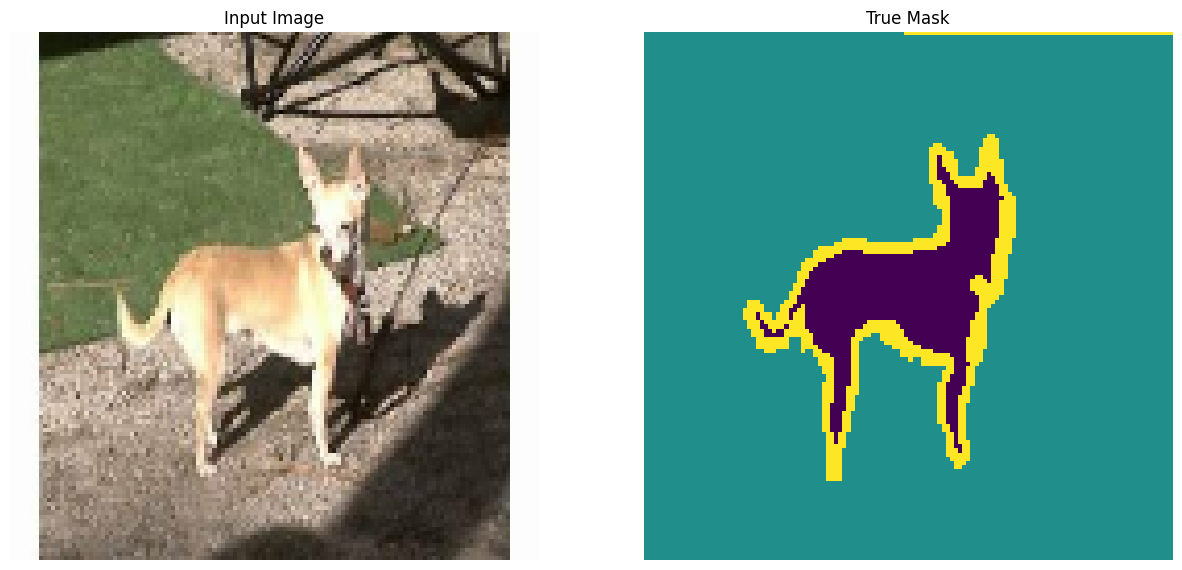

2024-04-13 01:21:27.796241: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


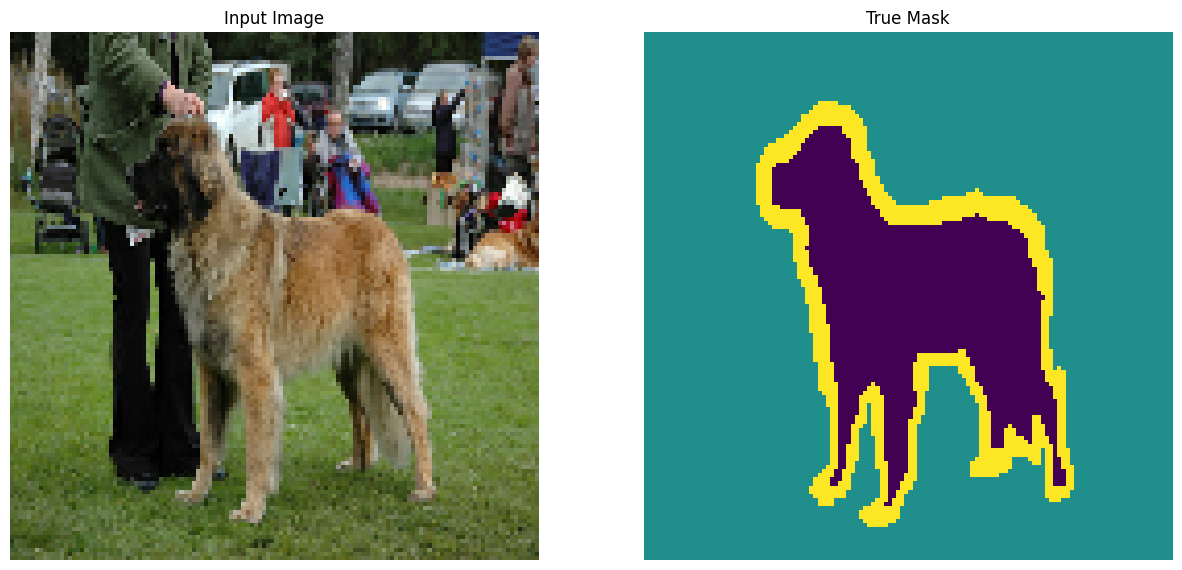

2024-04-13 01:21:27.964240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [13]:
for images, masks in train_batches.take(2):
  sample_image, sample_mask = images[0], masks[0]
  display([sample_image, sample_mask])

## Define the model
The model being used here is a modified [U-Net](https://arxiv.org/abs/1505.04597). A U-Net consists of an encoder (downsampler) and decoder (upsampler). To learn robust features and reduce the number of trainable parameters, use a pretrained model—[MobileNetV2](https://arxiv.org/abs/1801.04381)—as the encoder. For the decoder, you will use the upsample block, which is already implemented in the [pix2pix](https://github.com/tensorflow/examples/blob/master/tensorflow_examples/models/pix2pix/pix2pix.py) example in the TensorFlow Examples repo. (Check out the [pix2pix: Image-to-image translation with a conditional GAN](../generative/pix2pix.ipynb) tutorial in a notebook.)


As mentioned, the encoder is a pretrained MobileNetV2 model. You will use the model from `tf.keras.applications`. The encoder consists of specific outputs from intermediate layers in the model. Note that the encoder will not be trained during the training process.

In [14]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False


      0/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step


4202496/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The decoder/upsampler is simply a series of upsample blocks implemented in TensorFlow examples:

In [15]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [16]:
def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

Note that the number of filters on the last layer is set to the number of `output_channels`. This will be one output channel per class.

## Train the model

Now, all that is left to do is to compile and train the model.

Since this is a multiclass classification problem, use the `tf.keras.losses.SparseCategoricalCrossentropy` loss function with the `from_logits` argument set to `True`, since the labels are scalar integers instead of vectors of scores for each pixel of every class.

When running inference, the label assigned to the pixel is the channel with the highest value. This is what the `create_mask` function is doing.

In [17]:
OUTPUT_CLASSES = 3

model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Plot the resulting model architecture:

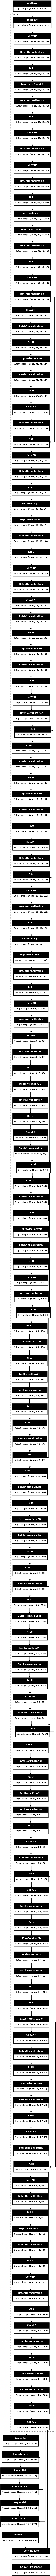

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True, dpi=64)

Try out the model to check what it predicts before training:

In [19]:
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [20]:
def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

I0000 00:00:1712971291.476380   10584 service.cc:145] XLA service 0x7f59b0002000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712971291.476433   10584 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1712971291.476437   10584 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1712971291.476440   10584 service.cc:153]   StreamExecutor device (2): Tesla T4, Compute Capability 7.5
I0000 00:00:1712971291.476443   10584 service.cc:153]   StreamExecutor device (3): Tesla T4, Compute Capability 7.5



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


I0000 00:00:1712971295.614196   10584 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


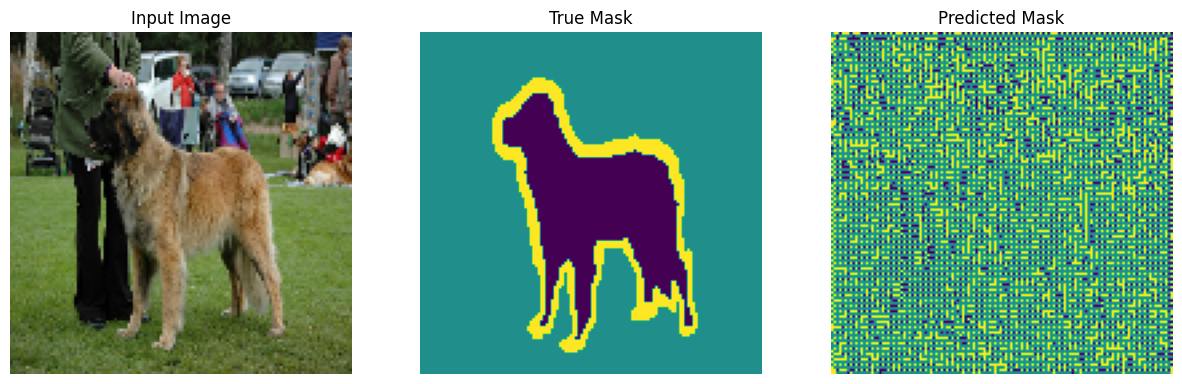

In [21]:
show_predictions()

The callback defined below is used to observe how the model improves while it is training:

In [22]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


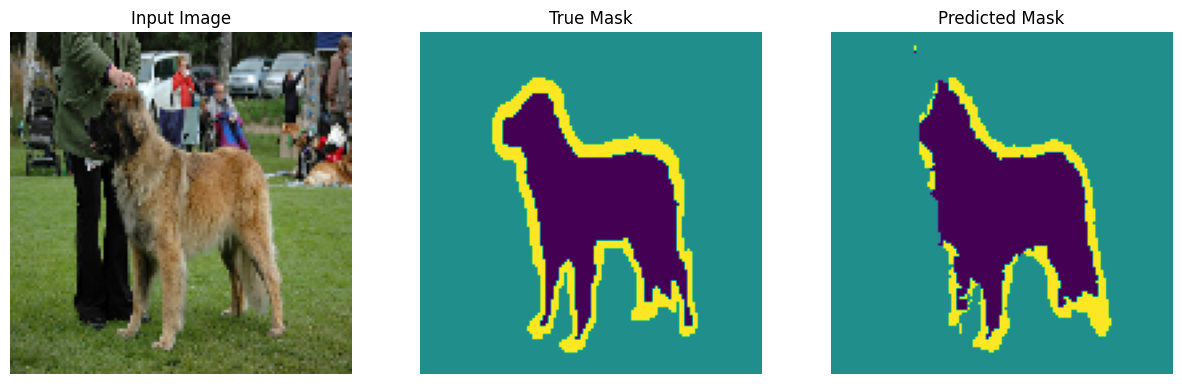


Sample Prediction after epoch 20


57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9271 - loss: 0.1783 - val_accuracy: 0.9080 - val_loss: 0.2467


In [23]:
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_batches, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_batches,
                          callbacks=[DisplayCallback()])

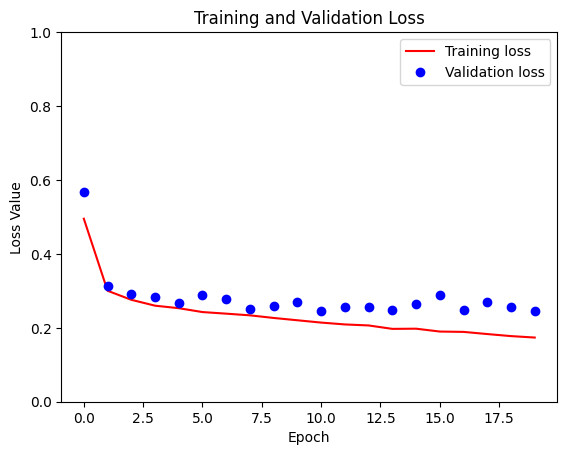

In [24]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure()
plt.plot(model_history.epoch, loss, 'r', label='Training loss')
plt.plot(model_history.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

## Make predictions

Now, make some predictions. In the interest of saving time, the number of epochs was kept small, but you may set this higher to achieve more accurate results.


1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


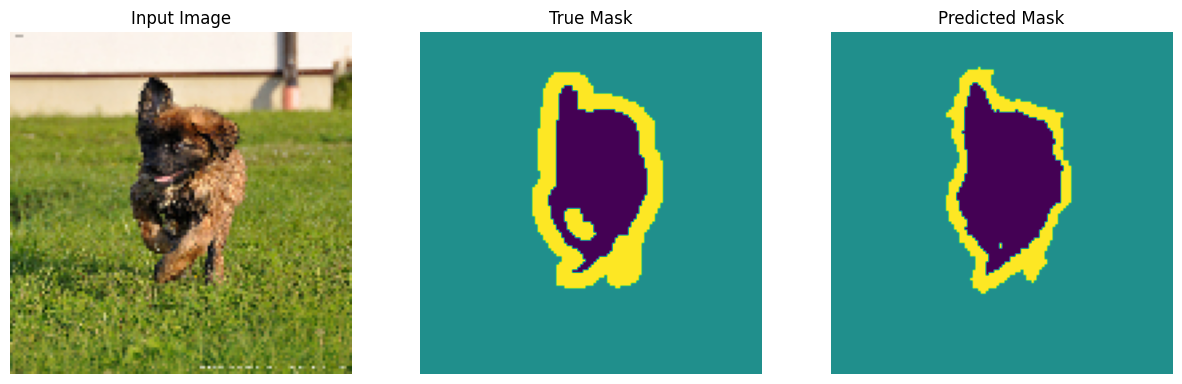


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


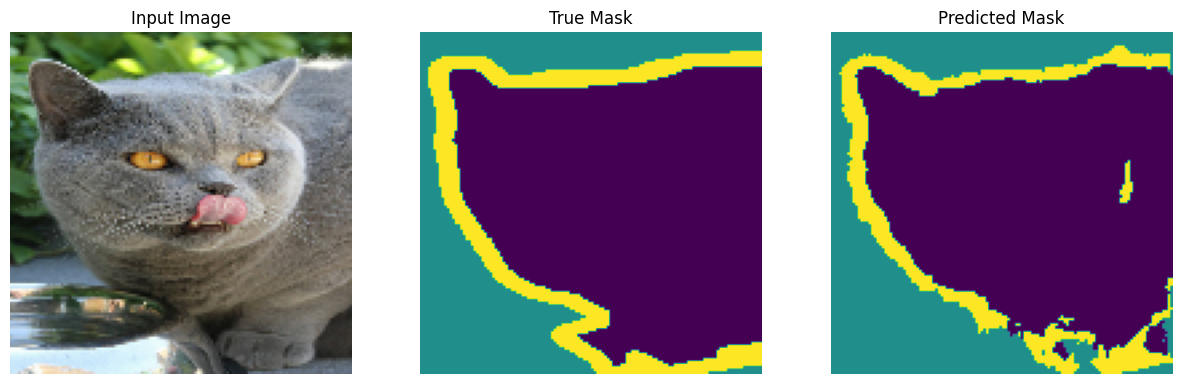


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


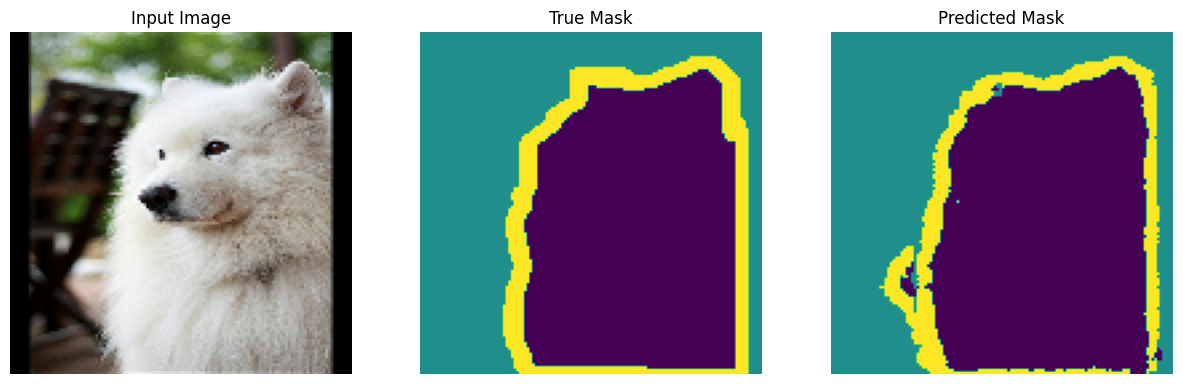

2024-04-13 01:24:26.351284: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [25]:
show_predictions(test_batches, 3)

## Optional: Imbalanced classes and class weights

Semantic segmentation datasets can be highly imbalanced meaning that particular class pixels can be present more inside images than that of other classes. Since segmentation problems can be treated as per-pixel classification problems, you can deal with the imbalance problem by weighing the loss function to account for this. It's a simple and elegant way to deal with this problem. Refer to the [Classification on imbalanced data](../structured_data/imbalanced_data.ipynb) tutorial to learn more.

To [avoid ambiguity](https://github.com/keras-team/keras/issues/3653#issuecomment-243939748), `Model.fit` does not support the `class_weight` argument for targets with 3+ dimensions.

In [26]:
try:
  model_history = model.fit(train_batches, epochs=EPOCHS,
                            steps_per_epoch=STEPS_PER_EPOCH,
                            class_weight = {0:2.0, 1:2.0, 2:1.0})
  assert False
except Exception as e:
  print(f"Expected {type(e).__name__}: {e}")

Epoch 1/20


W0000 00:00:1712971470.137772   10583 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5:59 6s/step - accuracy: 0.9335 - loss: 0.2482


 2/57 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.9342 - loss: 0.2413


 3/57 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.9329 - loss: 0.2406


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9318 - loss: 0.2400


 5/57 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9308 - loss: 0.2399


 6/57 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9301 - loss: 0.2402


 7/57 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9296 - loss: 0.2406


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9293 - loss: 0.2406


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9290 - loss: 0.2408


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9288 - loss: 0.2408


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9286 - loss: 0.2408 


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9284 - loss: 0.2408


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9282 - loss: 0.2410


14/57 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9281 - loss: 0.2412


15/57 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9279 - loss: 0.2413


16/57 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9278 - loss: 0.2414


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9277 - loss: 0.2415


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9276 - loss: 0.2417


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9275 - loss: 0.2419


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9274 - loss: 0.2421


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9273 - loss: 0.2423


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9272 - loss: 0.2425


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9271 - loss: 0.2427


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9270 - loss: 0.2429


25/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9269 - loss: 0.2431


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9268 - loss: 0.2433


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9267 - loss: 0.2436


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9266 - loss: 0.2438


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9265 - loss: 0.2441


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9264 - loss: 0.2443


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9263 - loss: 0.2446


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9263 - loss: 0.2449


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9262 - loss: 0.2451


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9261 - loss: 0.2453


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9260 - loss: 0.2455


36/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9260 - loss: 0.2457


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9259 - loss: 0.2459


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9258 - loss: 0.2461


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9258 - loss: 0.2463


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9257 - loss: 0.2465


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9257 - loss: 0.2467


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9256 - loss: 0.2469


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9255 - loss: 0.2471


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9255 - loss: 0.2472


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9254 - loss: 0.2474


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9254 - loss: 0.2476


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9253 - loss: 0.2477


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9253 - loss: 0.2479


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9252 - loss: 0.2480


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9252 - loss: 0.2481


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9252 - loss: 0.2483


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9251 - loss: 0.2484


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9251 - loss: 0.2486


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9250 - loss: 0.2487


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9250 - loss: 0.2489


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9249 - loss: 0.2490


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9249 - loss: 0.2492


57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9248 - loss: 0.2493


Epoch 2/20


W0000 00:00:1712971478.676844   10582 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert



 1/57 ━━━━━━━━━━━━━━━━━━━━ 2:40 3s/step - accuracy: 0.9205 - loss: 0.2641


 2/57 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.9193 - loss: 0.2664


 3/57 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.9182 - loss: 0.2697


 4/57 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.9181 - loss: 0.2686


 5/57 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9182 - loss: 0.2675


 6/57 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9183 - loss: 0.2674


 7/57 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9184 - loss: 0.2675


 8/57 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9185 - loss: 0.2676


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.9186 - loss: 0.2674


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9186 - loss: 0.2672


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9187 - loss: 0.2670


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9187 - loss: 0.2671


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9188 - loss: 0.2671


14/57 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9188 - loss: 0.2672


15/57 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9189 - loss: 0.2671


16/57 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9189 - loss: 0.2670 


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9190 - loss: 0.2668


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9190 - loss: 0.2666


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9191 - loss: 0.2664


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9192 - loss: 0.2661


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9193 - loss: 0.2658


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9194 - loss: 0.2655


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9195 - loss: 0.2652


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9196 - loss: 0.2649


25/57 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9196 - loss: 0.2647


26/57 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9197 - loss: 0.2644


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9198 - loss: 0.2642


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9198 - loss: 0.2641


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9199 - loss: 0.2639


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9200 - loss: 0.2637


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9200 - loss: 0.2635


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9201 - loss: 0.2634


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9201 - loss: 0.2632


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9202 - loss: 0.2631


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9202 - loss: 0.2630


36/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9203 - loss: 0.2628


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9203 - loss: 0.2627


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9204 - loss: 0.2626


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9204 - loss: 0.2625


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9205 - loss: 0.2624


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9205 - loss: 0.2623


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9205 - loss: 0.2623


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9205 - loss: 0.2622


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9206 - loss: 0.2622


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9206 - loss: 0.2621


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9206 - loss: 0.2621


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9206 - loss: 0.2621


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9206 - loss: 0.2620


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9206 - loss: 0.2620


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9207 - loss: 0.2619


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9207 - loss: 0.2619


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9207 - loss: 0.2619


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9207 - loss: 0.2618


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9207 - loss: 0.2618


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9207 - loss: 0.2618


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9207 - loss: 0.2617


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9208 - loss: 0.2617


57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.9208 - loss: 0.2617


Epoch 3/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9271 - loss: 0.2406


 2/57 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9275 - loss: 0.2395


 3/57 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9268 - loss: 0.2427


 4/57 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9267 - loss: 0.2431


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9264 - loss: 0.2440


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9261 - loss: 0.2446


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.9258 - loss: 0.2455


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9256 - loss: 0.2462


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9254 - loss: 0.2466


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9254 - loss: 0.2467


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9253 - loss: 0.2468


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9253 - loss: 0.2469


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9253 - loss: 0.2468


14/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9253 - loss: 0.2468


15/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9253 - loss: 0.2467


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9252 - loss: 0.2467


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9252 - loss: 0.2467


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9252 - loss: 0.2466


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9252 - loss: 0.2466


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9252 - loss: 0.2466


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9251 - loss: 0.2467


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9251 - loss: 0.2467


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9251 - loss: 0.2468


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9250 - loss: 0.2468


25/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9250 - loss: 0.2469


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9250 - loss: 0.2469


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9250 - loss: 0.2469


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9250 - loss: 0.2470


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9249 - loss: 0.2470


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9249 - loss: 0.2470


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9249 - loss: 0.2470


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9249 - loss: 0.2470


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9249 - loss: 0.2469


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9249 - loss: 0.2469


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9249 - loss: 0.2469


36/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9249 - loss: 0.2469


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9249 - loss: 0.2469


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9249 - loss: 0.2469


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9249 - loss: 0.2469


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9249 - loss: 0.2468


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9249 - loss: 0.2468


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9249 - loss: 0.2468


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9249 - loss: 0.2468


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9249 - loss: 0.2468


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9249 - loss: 0.2468


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9249 - loss: 0.2467


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9249 - loss: 0.2467


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9249 - loss: 0.2467


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9249 - loss: 0.2467


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9249 - loss: 0.2466


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9249 - loss: 0.2466


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9249 - loss: 0.2466


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9249 - loss: 0.2466


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9249 - loss: 0.2465


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9249 - loss: 0.2465


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9249 - loss: 0.2464


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9250 - loss: 0.2464


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9250 - loss: 0.2464


Epoch 4/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9206 - loss: 0.2615


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9215 - loss: 0.2584


 3/57 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9220 - loss: 0.2567 


 4/57 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9227 - loss: 0.2538


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9233 - loss: 0.2516


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9236 - loss: 0.2500


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9239 - loss: 0.2486


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9241 - loss: 0.2475


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9244 - loss: 0.2465


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9246 - loss: 0.2456


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9248 - loss: 0.2447


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9250 - loss: 0.2438


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9251 - loss: 0.2432


14/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9253 - loss: 0.2427


15/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9254 - loss: 0.2421


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9256 - loss: 0.2416


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9258 - loss: 0.2410


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9259 - loss: 0.2405


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9260 - loss: 0.2401


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9261 - loss: 0.2397


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9262 - loss: 0.2394


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9263 - loss: 0.2391


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9264 - loss: 0.2389


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9264 - loss: 0.2387


25/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9265 - loss: 0.2385


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9265 - loss: 0.2383


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9266 - loss: 0.2381


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9266 - loss: 0.2380


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9267 - loss: 0.2378


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9267 - loss: 0.2376


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9268 - loss: 0.2375


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9268 - loss: 0.2373


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9269 - loss: 0.2372


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9269 - loss: 0.2371


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9269 - loss: 0.2370


36/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9270 - loss: 0.2368


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9270 - loss: 0.2367


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9270 - loss: 0.2366


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9271 - loss: 0.2365


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9271 - loss: 0.2364


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9271 - loss: 0.2363


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9272 - loss: 0.2362


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9272 - loss: 0.2361


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9272 - loss: 0.2360


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9273 - loss: 0.2359


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9273 - loss: 0.2358


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9273 - loss: 0.2357


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9273 - loss: 0.2356


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9274 - loss: 0.2355


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9274 - loss: 0.2355


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9274 - loss: 0.2354


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9274 - loss: 0.2353


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9274 - loss: 0.2353


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9274 - loss: 0.2352


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9275 - loss: 0.2352


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9275 - loss: 0.2351


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9275 - loss: 0.2351


57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.9275 - loss: 0.2350


Epoch 5/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9267 - loss: 0.2371


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9266 - loss: 0.2369


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9274 - loss: 0.2341


 4/57 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9277 - loss: 0.2332 


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.9281 - loss: 0.2320


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9282 - loss: 0.2312


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9283 - loss: 0.2307


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9284 - loss: 0.2305


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9285 - loss: 0.2302


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9285 - loss: 0.2301


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9286 - loss: 0.2298


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9288 - loss: 0.2295


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9289 - loss: 0.2291


14/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9290 - loss: 0.2287


15/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9291 - loss: 0.2284


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9292 - loss: 0.2283


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9292 - loss: 0.2282


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9292 - loss: 0.2281


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9293 - loss: 0.2281


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9292 - loss: 0.2282


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9293 - loss: 0.2282


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9292 - loss: 0.2283


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9292 - loss: 0.2284


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9292 - loss: 0.2286


25/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9291 - loss: 0.2287


26/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9291 - loss: 0.2288


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9291 - loss: 0.2289


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9291 - loss: 0.2290


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9291 - loss: 0.2291


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9291 - loss: 0.2291


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9290 - loss: 0.2292


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9290 - loss: 0.2293


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9290 - loss: 0.2294


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9290 - loss: 0.2295


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9290 - loss: 0.2296


36/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9290 - loss: 0.2296


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9290 - loss: 0.2297


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9290 - loss: 0.2297


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9289 - loss: 0.2298


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9289 - loss: 0.2298


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9289 - loss: 0.2299


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9289 - loss: 0.2299


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9289 - loss: 0.2300


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9289 - loss: 0.2300


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9289 - loss: 0.2300


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9289 - loss: 0.2300


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9289 - loss: 0.2300


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9289 - loss: 0.2300


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9289 - loss: 0.2300


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9289 - loss: 0.2300


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9289 - loss: 0.2300


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9289 - loss: 0.2300


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9289 - loss: 0.2300


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9289 - loss: 0.2300


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9289 - loss: 0.2300


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9289 - loss: 0.2300


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9289 - loss: 0.2300


57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.9289 - loss: 0.2300


Epoch 6/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9265 - loss: 0.2269


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9274 - loss: 0.2257


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9273 - loss: 0.2264


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9276 - loss: 0.2261


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9277 - loss: 0.2266 


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9279 - loss: 0.2265


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9282 - loss: 0.2260


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9285 - loss: 0.2255


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9286 - loss: 0.2253


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9287 - loss: 0.2252


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9288 - loss: 0.2252


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9289 - loss: 0.2252


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9289 - loss: 0.2253


14/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9290 - loss: 0.2253


15/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9291 - loss: 0.2253


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9291 - loss: 0.2253


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9291 - loss: 0.2253


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9292 - loss: 0.2253


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9292 - loss: 0.2252


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9293 - loss: 0.2251


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9294 - loss: 0.2250


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9294 - loss: 0.2249


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9295 - loss: 0.2247


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9295 - loss: 0.2246


25/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9296 - loss: 0.2245


26/57 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9296 - loss: 0.2244


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9297 - loss: 0.2243


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9297 - loss: 0.2242


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9297 - loss: 0.2241


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9298 - loss: 0.2240


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9298 - loss: 0.2238


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9299 - loss: 0.2237


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9299 - loss: 0.2236


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9299 - loss: 0.2235


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9300 - loss: 0.2234


36/57 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9300 - loss: 0.2233


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9300 - loss: 0.2232


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9301 - loss: 0.2231


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9301 - loss: 0.2230


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9302 - loss: 0.2229


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9302 - loss: 0.2228


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9302 - loss: 0.2227


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9302 - loss: 0.2226


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9303 - loss: 0.2225


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9303 - loss: 0.2224


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9303 - loss: 0.2224


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9303 - loss: 0.2223


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9304 - loss: 0.2223


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9304 - loss: 0.2222


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9304 - loss: 0.2222


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9304 - loss: 0.2221


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9304 - loss: 0.2220


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9305 - loss: 0.2220


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9305 - loss: 0.2219


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9305 - loss: 0.2219


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9305 - loss: 0.2218


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9305 - loss: 0.2217


57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.9305 - loss: 0.2217


Epoch 7/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9323 - loss: 0.2171


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9336 - loss: 0.2135


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9338 - loss: 0.2121


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9340 - loss: 0.2106


 5/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9341 - loss: 0.2098


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9341 - loss: 0.2095


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9340 - loss: 0.2095


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9339 - loss: 0.2094


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9339 - loss: 0.2095


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9339 - loss: 0.2095


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9339 - loss: 0.2094


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9340 - loss: 0.2092


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9341 - loss: 0.2091


14/57 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9341 - loss: 0.2090


15/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9341 - loss: 0.2089


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9341 - loss: 0.2088


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9341 - loss: 0.2088


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9341 - loss: 0.2088


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9342 - loss: 0.2088


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9342 - loss: 0.2088


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9342 - loss: 0.2088


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9342 - loss: 0.2087


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9342 - loss: 0.2087


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9342 - loss: 0.2087


25/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9342 - loss: 0.2087


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9342 - loss: 0.2088


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9342 - loss: 0.2088


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9342 - loss: 0.2088


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9342 - loss: 0.2088


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9342 - loss: 0.2088


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9342 - loss: 0.2088


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9342 - loss: 0.2089


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9342 - loss: 0.2089


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9342 - loss: 0.2089


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9342 - loss: 0.2090


36/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9341 - loss: 0.2090


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9341 - loss: 0.2091


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9341 - loss: 0.2091


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9341 - loss: 0.2091


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9341 - loss: 0.2092


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9341 - loss: 0.2092


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9341 - loss: 0.2092


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9341 - loss: 0.2093


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9341 - loss: 0.2093


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9341 - loss: 0.2093


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9341 - loss: 0.2093


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9341 - loss: 0.2094


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9341 - loss: 0.2094


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9341 - loss: 0.2094


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9341 - loss: 0.2094


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9341 - loss: 0.2094


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9341 - loss: 0.2094


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9341 - loss: 0.2094


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9341 - loss: 0.2094


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9341 - loss: 0.2095


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9341 - loss: 0.2095


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9340 - loss: 0.2095


57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.9340 - loss: 0.2095


Epoch 8/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9320 - loss: 0.2280


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9326 - loss: 0.2246


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9325 - loss: 0.2231


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9326 - loss: 0.2215


 5/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9328 - loss: 0.2200


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9331 - loss: 0.2186


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9332 - loss: 0.2178


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9333 - loss: 0.2169


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9335 - loss: 0.2160


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9336 - loss: 0.2154


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9336 - loss: 0.2149


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9337 - loss: 0.2144


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9338 - loss: 0.2138


14/57 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9339 - loss: 0.2134


15/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9340 - loss: 0.2129


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9340 - loss: 0.2125


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9341 - loss: 0.2121


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9342 - loss: 0.2118


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9342 - loss: 0.2115


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9343 - loss: 0.2112


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9343 - loss: 0.2110


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9344 - loss: 0.2108


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9344 - loss: 0.2106


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9344 - loss: 0.2104


25/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9345 - loss: 0.2102


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9345 - loss: 0.2100


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9345 - loss: 0.2099


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9345 - loss: 0.2097


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9345 - loss: 0.2096


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9346 - loss: 0.2095


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9346 - loss: 0.2094


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9346 - loss: 0.2093


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9346 - loss: 0.2092


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9346 - loss: 0.2091


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9346 - loss: 0.2090


36/57 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9347 - loss: 0.2089


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9347 - loss: 0.2088


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9347 - loss: 0.2087


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9347 - loss: 0.2087


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9347 - loss: 0.2086


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9347 - loss: 0.2085


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9347 - loss: 0.2085


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9347 - loss: 0.2084


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9347 - loss: 0.2083


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9347 - loss: 0.2083


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9348 - loss: 0.2082


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9348 - loss: 0.2082


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9348 - loss: 0.2081


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9348 - loss: 0.2081


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9348 - loss: 0.2080


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9348 - loss: 0.2079


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9348 - loss: 0.2079


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9348 - loss: 0.2078


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9349 - loss: 0.2077


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9349 - loss: 0.2077


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9349 - loss: 0.2076


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9349 - loss: 0.2076


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9349 - loss: 0.2075


Epoch 9/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9370 - loss: 0.2039


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9354 - loss: 0.2087


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9350 - loss: 0.2087


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9346 - loss: 0.2093


 5/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9346 - loss: 0.2089


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9346 - loss: 0.2086


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9345 - loss: 0.2085


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9344 - loss: 0.2087


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9343 - loss: 0.2090


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9343 - loss: 0.2093


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9343 - loss: 0.2095


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9343 - loss: 0.2095


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9342 - loss: 0.2097


14/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9342 - loss: 0.2098


15/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9341 - loss: 0.2099


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9341 - loss: 0.2100


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9341 - loss: 0.2101


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9341 - loss: 0.2102


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9341 - loss: 0.2102


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9340 - loss: 0.2103


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9340 - loss: 0.2103


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9340 - loss: 0.2103


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9340 - loss: 0.2103


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9341 - loss: 0.2103


25/57 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9341 - loss: 0.2102


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9341 - loss: 0.2102


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9341 - loss: 0.2101


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9341 - loss: 0.2101


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9341 - loss: 0.2100


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9342 - loss: 0.2099


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9342 - loss: 0.2098


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9342 - loss: 0.2097


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9342 - loss: 0.2097


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9342 - loss: 0.2097


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9342 - loss: 0.2096


36/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9342 - loss: 0.2096


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9343 - loss: 0.2096


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9343 - loss: 0.2095


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9343 - loss: 0.2095


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9343 - loss: 0.2095


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9343 - loss: 0.2095


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9343 - loss: 0.2095


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9343 - loss: 0.2095


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9343 - loss: 0.2095


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9343 - loss: 0.2094


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9343 - loss: 0.2094


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9343 - loss: 0.2094


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9343 - loss: 0.2094


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9343 - loss: 0.2093


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9344 - loss: 0.2093


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9344 - loss: 0.2093


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9344 - loss: 0.2093


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9344 - loss: 0.2092


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9344 - loss: 0.2092


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9344 - loss: 0.2092


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9344 - loss: 0.2091


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9344 - loss: 0.2091


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9344 - loss: 0.2091


Epoch 10/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9363 - loss: 0.1953


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9367 - loss: 0.1960


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9363 - loss: 0.1977


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9362 - loss: 0.1984


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9362 - loss: 0.1986


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9364 - loss: 0.1987


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9365 - loss: 0.1988


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9366 - loss: 0.1986


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9367 - loss: 0.1985


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9368 - loss: 0.1983


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9368 - loss: 0.1982


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9368 - loss: 0.1981


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9369 - loss: 0.1979


14/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9370 - loss: 0.1978


15/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9370 - loss: 0.1976


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9371 - loss: 0.1974


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9372 - loss: 0.1972


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9372 - loss: 0.1972


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9372 - loss: 0.1970


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9373 - loss: 0.1969


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9373 - loss: 0.1968


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9374 - loss: 0.1966


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9374 - loss: 0.1965


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9375 - loss: 0.1964


25/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9375 - loss: 0.1963


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9375 - loss: 0.1962


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9376 - loss: 0.1961


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9376 - loss: 0.1960


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9376 - loss: 0.1959


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9376 - loss: 0.1959


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9377 - loss: 0.1958


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9377 - loss: 0.1957


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9377 - loss: 0.1956


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9377 - loss: 0.1956


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9378 - loss: 0.1955


36/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9378 - loss: 0.1954


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9378 - loss: 0.1954


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9378 - loss: 0.1953


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9379 - loss: 0.1952


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9379 - loss: 0.1952


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9379 - loss: 0.1951


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9379 - loss: 0.1951


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9379 - loss: 0.1951


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9379 - loss: 0.1950


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9379 - loss: 0.1950


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9380 - loss: 0.1950


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9380 - loss: 0.1950


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9380 - loss: 0.1950


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9380 - loss: 0.1949


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9380 - loss: 0.1949


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9380 - loss: 0.1949


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9380 - loss: 0.1949


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9380 - loss: 0.1949


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9380 - loss: 0.1949


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9380 - loss: 0.1949


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9380 - loss: 0.1949


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9380 - loss: 0.1949


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9380 - loss: 0.1949


Epoch 11/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9384 - loss: 0.1892


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9377 - loss: 0.1940


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9382 - loss: 0.1939


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9384 - loss: 0.1940


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9384 - loss: 0.1945


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9383 - loss: 0.1948


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9382 - loss: 0.1952


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9380 - loss: 0.1957


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9379 - loss: 0.1960


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9378 - loss: 0.1962


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9377 - loss: 0.1964


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9376 - loss: 0.1965


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9376 - loss: 0.1966


14/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9375 - loss: 0.1966


15/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9375 - loss: 0.1966


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9376 - loss: 0.1966


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9376 - loss: 0.1966


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9375 - loss: 0.1966


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9375 - loss: 0.1967


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9375 - loss: 0.1967


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9375 - loss: 0.1967


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9375 - loss: 0.1967


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9375 - loss: 0.1967


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9375 - loss: 0.1967


25/57 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9375 - loss: 0.1967


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9375 - loss: 0.1967


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9375 - loss: 0.1967


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9375 - loss: 0.1967


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9375 - loss: 0.1967


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9375 - loss: 0.1967


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9375 - loss: 0.1967


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9375 - loss: 0.1966


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9376 - loss: 0.1966


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9376 - loss: 0.1966


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9376 - loss: 0.1966


36/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9376 - loss: 0.1965


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9376 - loss: 0.1965


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9376 - loss: 0.1964


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9376 - loss: 0.1964


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9376 - loss: 0.1963


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9376 - loss: 0.1963


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9377 - loss: 0.1962


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9377 - loss: 0.1962


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9377 - loss: 0.1961


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9377 - loss: 0.1961


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9377 - loss: 0.1960


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9377 - loss: 0.1960


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9378 - loss: 0.1959


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9378 - loss: 0.1959


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9378 - loss: 0.1958


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9378 - loss: 0.1958


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9378 - loss: 0.1957


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9378 - loss: 0.1956


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9379 - loss: 0.1956


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9379 - loss: 0.1955


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9379 - loss: 0.1954


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9379 - loss: 0.1954


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9379 - loss: 0.1953


Epoch 12/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9387 - loss: 0.1860


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9395 - loss: 0.1835


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9396 - loss: 0.1832


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9399 - loss: 0.1831


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9400 - loss: 0.1835


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9399 - loss: 0.1843


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9399 - loss: 0.1846


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9400 - loss: 0.1847


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9400 - loss: 0.1849


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9400 - loss: 0.1850


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9400 - loss: 0.1851


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9401 - loss: 0.1851


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9401 - loss: 0.1851


14/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9401 - loss: 0.1851


15/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9402 - loss: 0.1851


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9402 - loss: 0.1851


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9402 - loss: 0.1851


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9402 - loss: 0.1850


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9403 - loss: 0.1849


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9403 - loss: 0.1849


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9403 - loss: 0.1849


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9404 - loss: 0.1848


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9404 - loss: 0.1848


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9404 - loss: 0.1847


25/57 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9404 - loss: 0.1847


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9405 - loss: 0.1846


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9405 - loss: 0.1846


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9405 - loss: 0.1845


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9405 - loss: 0.1845


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9406 - loss: 0.1845


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9406 - loss: 0.1845


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9406 - loss: 0.1844


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9406 - loss: 0.1844


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9406 - loss: 0.1844


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9406 - loss: 0.1844


36/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9407 - loss: 0.1844


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9407 - loss: 0.1844


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9407 - loss: 0.1844


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9407 - loss: 0.1844


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9407 - loss: 0.1844


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9407 - loss: 0.1843


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9407 - loss: 0.1843


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9407 - loss: 0.1843


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9408 - loss: 0.1843


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9408 - loss: 0.1842


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9408 - loss: 0.1842


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9408 - loss: 0.1842


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9408 - loss: 0.1841


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9408 - loss: 0.1841


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9408 - loss: 0.1841


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9409 - loss: 0.1841


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9409 - loss: 0.1840


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9409 - loss: 0.1840


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9409 - loss: 0.1840


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9409 - loss: 0.1840


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9409 - loss: 0.1840


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9409 - loss: 0.1840


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9409 - loss: 0.1839


Epoch 13/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9376 - loss: 0.1942


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9378 - loss: 0.1943


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9387 - loss: 0.1923


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9391 - loss: 0.1915


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9397 - loss: 0.1900


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9399 - loss: 0.1890


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9401 - loss: 0.1885


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9403 - loss: 0.1878


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9405 - loss: 0.1871


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9407 - loss: 0.1865


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9408 - loss: 0.1861


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9408 - loss: 0.1859


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9409 - loss: 0.1857


14/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9410 - loss: 0.1854


15/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9410 - loss: 0.1851


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9411 - loss: 0.1849


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9412 - loss: 0.1848


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9412 - loss: 0.1847


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9413 - loss: 0.1846


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9413 - loss: 0.1844


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9413 - loss: 0.1843


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9414 - loss: 0.1842


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9414 - loss: 0.1841


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9415 - loss: 0.1839


25/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9415 - loss: 0.1838


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9415 - loss: 0.1837


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9416 - loss: 0.1836


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9416 - loss: 0.1835


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9416 - loss: 0.1834


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9417 - loss: 0.1833


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9417 - loss: 0.1832


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9417 - loss: 0.1831


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9417 - loss: 0.1830


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9418 - loss: 0.1829


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9418 - loss: 0.1828


36/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9418 - loss: 0.1827


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9419 - loss: 0.1826


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9419 - loss: 0.1825


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9419 - loss: 0.1825


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9419 - loss: 0.1824


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9419 - loss: 0.1823


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9419 - loss: 0.1823


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9420 - loss: 0.1822


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9420 - loss: 0.1822


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9420 - loss: 0.1821


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9420 - loss: 0.1821


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9420 - loss: 0.1820


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9420 - loss: 0.1820


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9420 - loss: 0.1819


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9420 - loss: 0.1819


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9420 - loss: 0.1819


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9421 - loss: 0.1818


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9421 - loss: 0.1818


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9421 - loss: 0.1817


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9421 - loss: 0.1817


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9421 - loss: 0.1817


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9421 - loss: 0.1816


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9421 - loss: 0.1816


Epoch 14/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9415 - loss: 0.1732


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9405 - loss: 0.1751


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9397 - loss: 0.1777


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9399 - loss: 0.1781


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9403 - loss: 0.1780


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9406 - loss: 0.1778


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9409 - loss: 0.1776


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9411 - loss: 0.1775


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9413 - loss: 0.1774


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9415 - loss: 0.1772


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9416 - loss: 0.1770


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9417 - loss: 0.1769


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9418 - loss: 0.1768


14/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9419 - loss: 0.1766


15/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9420 - loss: 0.1765


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9421 - loss: 0.1764


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9422 - loss: 0.1763


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9423 - loss: 0.1762


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9424 - loss: 0.1760


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9424 - loss: 0.1759


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9425 - loss: 0.1758


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9426 - loss: 0.1757


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9426 - loss: 0.1756


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9427 - loss: 0.1754


25/57 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9428 - loss: 0.1753


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9428 - loss: 0.1752


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9429 - loss: 0.1751


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9429 - loss: 0.1750


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9430 - loss: 0.1749


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9430 - loss: 0.1748


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9431 - loss: 0.1747


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9431 - loss: 0.1746


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9432 - loss: 0.1745


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9432 - loss: 0.1744


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9432 - loss: 0.1743


36/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9433 - loss: 0.1743


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9433 - loss: 0.1742


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9433 - loss: 0.1742


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9434 - loss: 0.1741


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9434 - loss: 0.1741


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9434 - loss: 0.1741


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9434 - loss: 0.1741


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9434 - loss: 0.1741


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9434 - loss: 0.1740


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9435 - loss: 0.1740


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9435 - loss: 0.1740


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9435 - loss: 0.1740


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9435 - loss: 0.1740


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9435 - loss: 0.1740


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9435 - loss: 0.1739


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9436 - loss: 0.1739


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9436 - loss: 0.1739


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9436 - loss: 0.1738


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9436 - loss: 0.1738


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9436 - loss: 0.1738


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9436 - loss: 0.1737


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9437 - loss: 0.1737


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9437 - loss: 0.1737


Epoch 15/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9428 - loss: 0.1799


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9441 - loss: 0.1760


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9446 - loss: 0.1746


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9448 - loss: 0.1737


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9448 - loss: 0.1732


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9446 - loss: 0.1732


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9445 - loss: 0.1734


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9444 - loss: 0.1735


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9443 - loss: 0.1736


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9443 - loss: 0.1738


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9442 - loss: 0.1740


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9442 - loss: 0.1741


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9441 - loss: 0.1742


14/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9441 - loss: 0.1742


15/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9441 - loss: 0.1742


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9441 - loss: 0.1743


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9440 - loss: 0.1743


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9440 - loss: 0.1743


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9440 - loss: 0.1743


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9440 - loss: 0.1743


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9440 - loss: 0.1743


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9441 - loss: 0.1742


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9441 - loss: 0.1742


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9441 - loss: 0.1741


25/57 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9441 - loss: 0.1741


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9441 - loss: 0.1741


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9441 - loss: 0.1740


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9441 - loss: 0.1740


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9441 - loss: 0.1739


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9442 - loss: 0.1738


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9442 - loss: 0.1738


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9442 - loss: 0.1737


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9442 - loss: 0.1737


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9442 - loss: 0.1736


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9442 - loss: 0.1736


36/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9442 - loss: 0.1735


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9443 - loss: 0.1735


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9443 - loss: 0.1734


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9443 - loss: 0.1734


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9443 - loss: 0.1733


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9443 - loss: 0.1733


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9443 - loss: 0.1732


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9444 - loss: 0.1732


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9444 - loss: 0.1731


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9444 - loss: 0.1731


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9444 - loss: 0.1730


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9444 - loss: 0.1730


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9444 - loss: 0.1729


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9445 - loss: 0.1729


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9445 - loss: 0.1728


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9445 - loss: 0.1728


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9445 - loss: 0.1727


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9445 - loss: 0.1727


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9445 - loss: 0.1726


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9445 - loss: 0.1726


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9446 - loss: 0.1725


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9446 - loss: 0.1725


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9446 - loss: 0.1724


Epoch 16/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9414 - loss: 0.1761


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9422 - loss: 0.1736


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9430 - loss: 0.1722


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9438 - loss: 0.1710


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9444 - loss: 0.1702


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9445 - loss: 0.1701


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9447 - loss: 0.1700


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9448 - loss: 0.1698


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9448 - loss: 0.1696


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9449 - loss: 0.1695


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9448 - loss: 0.1696


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9449 - loss: 0.1695


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9449 - loss: 0.1695


14/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9450 - loss: 0.1694


15/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9450 - loss: 0.1694


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9450 - loss: 0.1694


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9450 - loss: 0.1694


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9451 - loss: 0.1693


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9451 - loss: 0.1693


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9451 - loss: 0.1693


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9452 - loss: 0.1692


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9452 - loss: 0.1692


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9452 - loss: 0.1691


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9453 - loss: 0.1690


25/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9453 - loss: 0.1689


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9453 - loss: 0.1689


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9454 - loss: 0.1688


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9454 - loss: 0.1688


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9454 - loss: 0.1687


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9454 - loss: 0.1687


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9455 - loss: 0.1686


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9455 - loss: 0.1686


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9455 - loss: 0.1685


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9455 - loss: 0.1685


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9456 - loss: 0.1684


36/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9456 - loss: 0.1684


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9456 - loss: 0.1683


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9456 - loss: 0.1683


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9456 - loss: 0.1682


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9457 - loss: 0.1682


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9457 - loss: 0.1682


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9457 - loss: 0.1681


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9457 - loss: 0.1681


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9457 - loss: 0.1680


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9457 - loss: 0.1680


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9458 - loss: 0.1679


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9458 - loss: 0.1679


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9458 - loss: 0.1679


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9458 - loss: 0.1678


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9458 - loss: 0.1678


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9458 - loss: 0.1677


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9459 - loss: 0.1677


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9459 - loss: 0.1677


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9459 - loss: 0.1676


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9459 - loss: 0.1676


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9459 - loss: 0.1676


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9459 - loss: 0.1675


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9459 - loss: 0.1675


Epoch 17/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9488 - loss: 0.1569


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9491 - loss: 0.1567


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9490 - loss: 0.1570


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9491 - loss: 0.1568


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9492 - loss: 0.1566


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9492 - loss: 0.1568


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9492 - loss: 0.1571


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9491 - loss: 0.1574


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9489 - loss: 0.1577


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9488 - loss: 0.1580


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9487 - loss: 0.1583


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9486 - loss: 0.1586


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9486 - loss: 0.1588


14/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9486 - loss: 0.1590


15/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9485 - loss: 0.1592


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9484 - loss: 0.1594


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9484 - loss: 0.1596


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9483 - loss: 0.1598


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9483 - loss: 0.1599


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9483 - loss: 0.1600


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9483 - loss: 0.1601


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9483 - loss: 0.1602


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9482 - loss: 0.1603


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9482 - loss: 0.1605


25/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9482 - loss: 0.1606


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9481 - loss: 0.1607


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9481 - loss: 0.1607


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9481 - loss: 0.1608


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9481 - loss: 0.1609


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9481 - loss: 0.1610


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9480 - loss: 0.1610


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9480 - loss: 0.1611


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9480 - loss: 0.1611


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9480 - loss: 0.1612


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9480 - loss: 0.1612


36/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9480 - loss: 0.1613


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9480 - loss: 0.1613


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9480 - loss: 0.1613


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9480 - loss: 0.1614


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9479 - loss: 0.1614


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9479 - loss: 0.1614


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9479 - loss: 0.1614


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9479 - loss: 0.1615


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9479 - loss: 0.1615


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9479 - loss: 0.1615


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9479 - loss: 0.1615


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9479 - loss: 0.1615


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9479 - loss: 0.1615


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9479 - loss: 0.1615


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9479 - loss: 0.1616


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9479 - loss: 0.1616


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9479 - loss: 0.1616


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9479 - loss: 0.1616


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9479 - loss: 0.1616


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9479 - loss: 0.1616


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9479 - loss: 0.1616


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9479 - loss: 0.1616


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9479 - loss: 0.1616


Epoch 18/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9485 - loss: 0.1598


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9479 - loss: 0.1598


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9478 - loss: 0.1597


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9478 - loss: 0.1597


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9478 - loss: 0.1597


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9476 - loss: 0.1600


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9475 - loss: 0.1602


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9476 - loss: 0.1603


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9476 - loss: 0.1603


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9476 - loss: 0.1602


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9476 - loss: 0.1602


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9476 - loss: 0.1603


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9476 - loss: 0.1604


14/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9476 - loss: 0.1605


15/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9476 - loss: 0.1606


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9476 - loss: 0.1606


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9476 - loss: 0.1606


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9476 - loss: 0.1606


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9476 - loss: 0.1605


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9477 - loss: 0.1605


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9477 - loss: 0.1604


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9477 - loss: 0.1603


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9478 - loss: 0.1602


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9478 - loss: 0.1601


25/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9478 - loss: 0.1601


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9479 - loss: 0.1600


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9479 - loss: 0.1599


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9479 - loss: 0.1599


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9479 - loss: 0.1598


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9480 - loss: 0.1598


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9480 - loss: 0.1597


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9480 - loss: 0.1597


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9480 - loss: 0.1597


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9480 - loss: 0.1596


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9481 - loss: 0.1596


36/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9481 - loss: 0.1595


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9481 - loss: 0.1595


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9481 - loss: 0.1594


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9481 - loss: 0.1594


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9482 - loss: 0.1594


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9482 - loss: 0.1593


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9482 - loss: 0.1593


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9482 - loss: 0.1592


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9482 - loss: 0.1592


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9483 - loss: 0.1591


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9483 - loss: 0.1591


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9483 - loss: 0.1591


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9483 - loss: 0.1590


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9483 - loss: 0.1590


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9483 - loss: 0.1590


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9483 - loss: 0.1590


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9484 - loss: 0.1589


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9484 - loss: 0.1589


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9484 - loss: 0.1589


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9484 - loss: 0.1589


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9484 - loss: 0.1589


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9484 - loss: 0.1589


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9484 - loss: 0.1588


Epoch 19/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9491 - loss: 0.1630


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9488 - loss: 0.1630


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9486 - loss: 0.1624


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9486 - loss: 0.1616


 5/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9484 - loss: 0.1617


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9484 - loss: 0.1614


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9485 - loss: 0.1612


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9484 - loss: 0.1612


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9484 - loss: 0.1611


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9483 - loss: 0.1610


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9483 - loss: 0.1609


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9483 - loss: 0.1609


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9483 - loss: 0.1609


14/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9483 - loss: 0.1609


15/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9483 - loss: 0.1609


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9482 - loss: 0.1609


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9482 - loss: 0.1609


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9482 - loss: 0.1609


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9482 - loss: 0.1609


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9482 - loss: 0.1609


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9482 - loss: 0.1609


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9482 - loss: 0.1609


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9481 - loss: 0.1609


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9481 - loss: 0.1609


25/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9481 - loss: 0.1609


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9481 - loss: 0.1609


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9481 - loss: 0.1608


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9481 - loss: 0.1608


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9481 - loss: 0.1608


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9481 - loss: 0.1608


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9481 - loss: 0.1608


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9481 - loss: 0.1608


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9481 - loss: 0.1608


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9481 - loss: 0.1607


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9482 - loss: 0.1607


36/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9482 - loss: 0.1606


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9482 - loss: 0.1606


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9482 - loss: 0.1606


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9482 - loss: 0.1605


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9482 - loss: 0.1605


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9482 - loss: 0.1604


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9482 - loss: 0.1604


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9483 - loss: 0.1603


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9483 - loss: 0.1603


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9483 - loss: 0.1602


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9483 - loss: 0.1602


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9483 - loss: 0.1601


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9483 - loss: 0.1601


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9483 - loss: 0.1601


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9483 - loss: 0.1600


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9484 - loss: 0.1600


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9484 - loss: 0.1600


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9484 - loss: 0.1600


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9484 - loss: 0.1599


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9484 - loss: 0.1599


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9484 - loss: 0.1599


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9484 - loss: 0.1599


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9484 - loss: 0.1599


Epoch 20/20



 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9506 - loss: 0.1579


 2/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9508 - loss: 0.1577


 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9509 - loss: 0.1572


 4/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9512 - loss: 0.1562


 5/57 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9511 - loss: 0.1563


 6/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9508 - loss: 0.1565


 7/57 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9504 - loss: 0.1570


 8/57 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9502 - loss: 0.1574


 9/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9500 - loss: 0.1575


10/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9498 - loss: 0.1578


11/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9498 - loss: 0.1579


12/57 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9497 - loss: 0.1580


13/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9497 - loss: 0.1581


14/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9496 - loss: 0.1582


15/57 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9495 - loss: 0.1583


16/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9494 - loss: 0.1583


17/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9494 - loss: 0.1583


18/57 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9494 - loss: 0.1583


19/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9493 - loss: 0.1583


20/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9493 - loss: 0.1583


21/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9493 - loss: 0.1583


22/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9493 - loss: 0.1583


23/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9493 - loss: 0.1583


24/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9493 - loss: 0.1582


25/57 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9492 - loss: 0.1582


26/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9492 - loss: 0.1582


27/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9492 - loss: 0.1581


28/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9492 - loss: 0.1581


29/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9492 - loss: 0.1581


30/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9493 - loss: 0.1580


31/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9493 - loss: 0.1580


32/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9493 - loss: 0.1579


33/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9493 - loss: 0.1579


34/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9493 - loss: 0.1578


35/57 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9493 - loss: 0.1578


36/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9493 - loss: 0.1577


37/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9493 - loss: 0.1577


38/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9493 - loss: 0.1576


39/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9493 - loss: 0.1576


40/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9493 - loss: 0.1575


41/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9494 - loss: 0.1574


42/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9494 - loss: 0.1574


43/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9494 - loss: 0.1573


44/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9494 - loss: 0.1572


45/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9494 - loss: 0.1572


46/57 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9494 - loss: 0.1571


47/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9495 - loss: 0.1570


48/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9495 - loss: 0.1570


49/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9495 - loss: 0.1569


50/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9495 - loss: 0.1568


51/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9495 - loss: 0.1568


52/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9495 - loss: 0.1567


53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9496 - loss: 0.1567


54/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9496 - loss: 0.1566


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9496 - loss: 0.1566


56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9496 - loss: 0.1565


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9496 - loss: 0.1565


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9496 - loss: 0.1564


Expected AssertionError: 


So, in this case you need to implement the weighting yourself. You'll do this using sample weights: In addition to `(data, label)` pairs, `Model.fit` also accepts `(data, label, sample_weight)` triples.

Keras `Model.fit` propagates the `sample_weight` to the losses and metrics, which also accept a `sample_weight` argument. The sample weight is multiplied by the sample's value before the reduction step. For example:

In [27]:
label = np.array([0,0])
prediction = np.array([[-3., 0], [-3, 0]])
sample_weight = [1, 10]

loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction=tf.keras.losses.Reduction.NONE
)
loss(label, prediction, sample_weight).numpy()

array([ 3.0485873, 30.485874 ], dtype=float32)

So, to make sample weights for this tutorial, you need a function that takes a `(data, label)` pair and returns a `(data, label, sample_weight)` triple where the `sample_weight` is a 1-channel image containing the class weight for each pixel.

The simplest possible implementation is to use the label as an index into a `class_weight` list:

In [28]:
def add_sample_weights(image, label):
  # The weights for each class, with the constraint that:
  #     sum(class_weights) == 1.0
  class_weights = tf.constant([2.0, 2.0, 1.0])
  class_weights = class_weights/tf.reduce_sum(class_weights)

  # Create an image of `sample_weights` by using the label at each pixel as an
  # index into the `class weights` .
  sample_weights = tf.gather(class_weights, indices=tf.cast(label, tf.int32))

  return image, label, sample_weights

The resulting dataset elements contain 3 images each:

In [29]:
train_batches.map(add_sample_weights).element_spec

(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None))

Now, you can train a model on this weighted dataset:

In [30]:
weighted_model = unet_model(OUTPUT_CLASSES)
weighted_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [31]:
weighted_model.fit(
    train_batches.map(add_sample_weights),
    epochs=1,
    steps_per_epoch=10)

W0000 00:00:1712971591.144762   10585 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert



 1/10 ━━━━━━━━━━━━━━━━━━━━ 1:14 8s/step - accuracy: 0.3235 - loss: 0.5120


 2/10 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.3558 - loss: 0.4833


 3/10 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.3894 - loss: 0.4587


 4/10 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.4187 - loss: 0.4383


 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.4449 - loss: 0.4208


 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.4681 - loss: 0.4056


 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.4877 - loss: 0.3926


 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5053 - loss: 0.3811


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5212 - loss: 0.3708


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5356 - loss: 0.3614


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.5474 - loss: 0.3538


## Next steps

Now that you have an understanding of what image segmentation is and how it works, you can try this tutorial out with different intermediate layer outputs, or even different pretrained models. You may also challenge yourself by trying out the [Carvana](https://www.kaggle.com/c/carvana-image-masking-challenge/overview) image masking challenge hosted on Kaggle.

You may also want to see the [Tensorflow Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/README.md) for another model you can retrain on your own data. Pretrained models are available on [TensorFlow Hub](https://www.tensorflow.org/hub/tutorials/tf2_object_detection#optional).